In [37]:
import numpy as np
import matplotlib.pyplot as plt
from rum.basics import matprint
%matplotlib notebook

# Numerische Zeitableitungen

## a)
$
\begin{align}
\ T & =  t_0 < t_1 t_2 ... < t_n \\
\end{align}
$

In [2]:
t0 = 0.0
t1 = 1.0
N = 500
Nfine = 1000

T = np.linspace(t0,t1,N)
Tfine = np.linspace(t0,t1,Nfine)

## b)
ToDo: Schreiben Sie die Funktionen

ForwardEuler(i, T, f), BackwardEuler(i, T, f), MidpointRule(i, T, f)

welche die numerischen Ableitungen einer Funktion f berechnen. Hierbei soll ein Vektor der diskreten Zeitpunkte T uebergeben werden. Die Rueckgabe ist der Vektor der durch das entsprechende Verfahren approximierten Ableitung.

$
\begin{align}
f_1(t) & = cos(100t) \\
f_2(t) & = 5t^2 - 3t + 5 \\
f_3(t) & = e^{-5t} \\
\end{align}
$

In [3]:
##################
# func.m
##################

def func(t, a):
    # takes both scalars and numpy arrays
    # and a function selection parameter a
    # returns f
    if (a == 1):
        f = np.cos(100*t)
    elif(a == 2):
        f = 5*t*t - 3*t + 5
    elif(a == 3):
        f = np.exp(-5*t)
    else:
        f = 0
    return f


##################
# dfunc.m
##################

def dfunc(t, a):
    # takes both scalars and numpy arrays
    # and a function selection parameter a
    # returns df/dt
    if (a == 1):
        df = -100*np.sin(100*t)
    elif(a == 2):
        df = 10*t - 3
    elif(a == 3):
        df = -5*np.exp(-5*t)
    else:
        df = 0
    return df

In [4]:
def forwardEuler(T, f, i=None):
    """
    Differentiate f over (equidistant!) discrete times T
    using forward finite differences,
    where i is an optional list of indices of T
    for which to calculate the differential
    """

    if i is None:
        indices = np.arange(len(T))
    elif type(i) == int:
        indices = np.array([i])
    elif type(i) == list:
        indices = np.array(i)

    assert len(T) == len(f), "f and T must be of same length"
    assert indices.max() < len(T), "index in i is out of bounds for T"

    df = np.zeros(len(indices))
    for n, i in enumerate(indices):
        if i == len(T) - 1:
            # right boundary, cannot use forward differences
            df[n] = backwardEuler(T, f, [i])
        else:
            df[n] = (f[i+1] - f[i])/(T[i+1] - T[i])
    return df


def backwardEuler(T, f, i=None):
    """
    Differentiate f over (equidistant!) discrete times T
    using backward finite differences,
    where i is an optional list of indices of T
    for which to calculate the differential
    """
    if i is None:
        indices = np.arange(len(T))
    elif type(i) == int:
        indices = np.array([i])
    elif type(i) == list:
        indices = np.array(i)

    assert len(T) == len(f), "f and T must be of same length"
    assert indices.max() < len(T), "index in i is out of bounds for T"

    df = np.zeros(len(indices))
    for n, i in enumerate(indices):
        if i == 0:
            # left boundary, cannot use backward differences
            df[n] = forwardEuler(T, f, [i])
        else:
            df[n] = (f[i] - f[i-1])/(T[i] - T[i-1])
    return df


def midpointRule(T, f, i=None):
    """
    Differentiate f over (equidistant!) discrete times T
    using centrla finite differences,
    where i is an optional list of indices of T
    for which to calculate the differential
    """
    if i is None:
        indices = np.arange(len(T))
    elif type(i) == int:
        indices = np.array([i])
    elif type(i) == list:
        indices = np.array(i)

    assert len(T) == len(f), "f and T must be of same length"
    assert indices.max() < len(T), "index in i is out of bounds for T"

    df = np.zeros(len(indices))
    for n, i in enumerate(indices):
        if i == 0:
            # left boundary, use forward differences
            df[n] = forwardEuler(T, f, [i])
        elif i == len(T) - 1:
            # right boundary, use backward differces
            df[n] = backwardEuler(T, f, [i])
        else:
            df[n] = (f[i+1] - f[i-1])/(T[i+1] - T[i-1])
    return df


### $f_1(t) = cos(100t)$

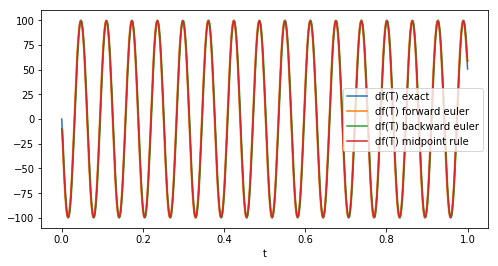

In [5]:
f = func(T,1)
df_ex = dfunc(Tfine,1)
df_fw = forwardEuler(T,f)
df_bw = backwardEuler(T,f)
df_mp = midpointRule(T,f)
fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(Tfine,df_ex, label='df(T) exact')
ax.plot(T,df_fw, label='df(T) forward euler')
ax.plot(T,df_bw, label='df(T) backward euler')
ax.plot(T,df_mp, label='df(T) midpoint rule')
ax.set_xlabel('t')
ax.legend();

### $f_2(t) = 5t^2 - 3t + 5 $

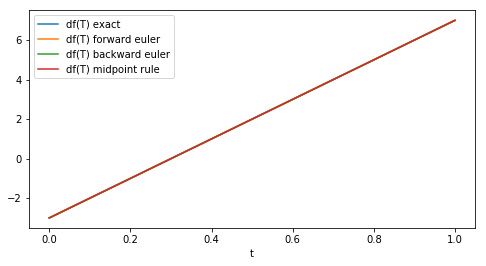

In [6]:
f = func(T,2)
df_ex = dfunc(Tfine,2)
df_fw = forwardEuler(T,f)
df_bw = backwardEuler(T,f)
df_mp = midpointRule(T,f)
fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(Tfine,df_ex, label='df(T) exact')
ax.plot(T,df_fw, label='df(T) forward euler')
ax.plot(T,df_bw, label='df(T) backward euler')
ax.plot(T,df_mp, label='df(T) midpoint rule')
ax.set_xlabel('t')
ax.legend();

## $ f_3(t) = e^{-5t} $

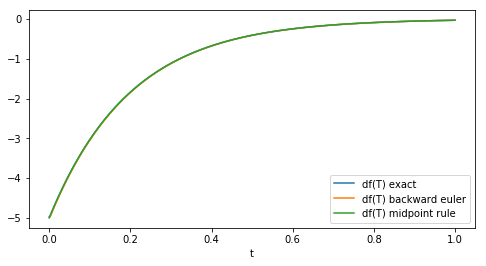

In [7]:
f = func(T,3)
df_ex = dfunc(Tfine,3)
df_fw = forwardEuler(T,f)
df_bw = backwardEuler(T,f)
df_mp = midpointRule(T,f)
fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(Tfine,df_ex, label='df(T) exact')
ax.plot(T,df_bw, label='df(T) backward euler')
ax.plot(T,df_mp, label='df(T) midpoint rule')
ax.set_xlabel('t')
ax.legend();

# Numerische Differentation in Matrixform

## Sparse Matrices in Numpy

**Advantages of the COO format**
- facilitates fast conversion among sparse formats
- permits duplicate entries (see example)
- very fast conversion to and from CSR/CSC formats

**Disadvantages of the COO format**
- does not directly support:
  -      arithmetic operations
  -      slicing

**Intended Usage**
- COO is a fast format for constructing sparse matrices
- Once a matrix has been constructed, convert to CSR or CSC format for fast arithmetic and matrix vector operations
- By default when converting to CSR or CSC format, duplicate (i,j) entries will be summed together. This facilitates efficient construction of finite element matrices and the like. (see example)

**Advantages of the CSR format**
- efficient arithmetic operations CSR + CSR, CSR * CSR, etc.
- efficient row slicing
- fast matrix vector products

**Disadvantages of the CSR format**
- slow column slicing operations (consider CSC)
- changes to the sparsity structure are expensive (consider LIL or DOK)


**Advantages of the CSC format**
- efficient arithmetic operations CSC + CSC, CSC * CSC, etc.
- efficient column slicing
- fast matrix vector products (CSR, BSR may be faster)

**Disadvantages of the CSC format**
- slow row slicing operations (consider CSR)
- changes to the sparsity structure are expensive (consider LIL or DOK)

## Example 

In [8]:
## Example
import scipy.sparse
from scipy.sparse import csc_matrix, csr_matrix, coo_matrix

row = np.array([0,0,1,1,1,2,2])
col = np.array([0,1,0,1,2,1,2])
data = np.array([1,-1,-1,2,-1,-1,1])

coo = coo_matrix((data,(row,col)), shape=(3,3))
matprint(coo.toarray())

 1 -1  0 
-1  2 -1 
 0 -1  1 


## Interoperability of scipy.sparse and numpy
Quick example to show potential problems, using a small foward differntiation

In [9]:
N=5
T = np.linspace(0,1,N)
f = func(T,3)
df_ex = dfunc(T,3)

### Setup system matrix for foward diff
Setup system matrix using scipy.sparse.coo_matrix. First, generate   arrays for row, column indices and base values. To take into account the step size h, the array of values is divided by h in place. To allow operations with the sparse matrix, it needs to be converted to the CSR format. (The CSR format is specially suitable for fast matrix vector products.) Convert again to array for printing and check output.

In [10]:
afw_row = np.array([0,0,1,1,2,2,3,3,4,4])
afw_col = np.array([0,1,1,2,2,3,3,4,3,4])
afw_val = np.array([-1, 1,-1,1,-1,1,-1,1,-1,1])
# include h=T-t0/N
h = (T[-1] - T[0])/len(T)
print("time step = h = {}".format(h))
afw_val = afw_val / h
AFW = coo_matrix((afw_val, (afw_row, afw_col)), shape=(5, 5))
AFW = AFW.tocsr()
print("Euler FW system matrix:")
matprint(AFW.toarray())

time step = h = 0.2
Euler FW system matrix:
-5  5  0  0 0 
 0 -5  5  0 0 
 0  0 -5  5 0 
 0  0  0 -5 5 
 0  0  0 -5 5 


### Exact values of f and df for comparison

In [11]:
print(f)
print(df_ex)

[1.         0.2865048  0.082085   0.02351775 0.00673795]
[-5.         -1.43252398 -0.41042499 -0.11758873 -0.03368973]


### Calculation with dense system matrix
Check the general correctness of our matrix by converting to dense, then using np.dot to perform matrix-vector multiplication

In [12]:
# calculate result converting AFW to dense first
res = np.dot(AFW.todense(), f)
print(res)

[[-3.56747602 -1.02209899 -0.29283626 -0.08389899 -0.08389899]]


### Calculation with sparse system matrix
Of course we don't want to convert to dense. However, if you try the same thing without converting to a dense array, we get a strange result. It is important to **use the scipy object's methods and _not_ numpy.dot, etc**. See the comparison below and compare to the exact result and the dense matrix-vector multiplication result above.

See also https://docs.scipy.org/doc/scipy/reference/sparse.html

In [13]:
# calculate result using np.dot()
res = np.dot(AFW,f)
print(res)

[<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>
 <5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>
 <5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>
 <5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>
 <5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>]


In [14]:
# calculate result using scipy.sparse.csr_matrix.dot()
res = AFW.dot(f)
print(type(res))
print(res)

<class 'numpy.ndarray'>
[-3.56747602 -1.02209899 -0.29283626 -0.08389899 -0.08389899]


### Timeit

In [15]:
%timeit res = AFW.dot(f)

4.92 µs ± 755 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%timeit res = np.dot(AFW.todense(),f)

9.46 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## a) System matrix for forward-Euler
Setup a system matrix with variable size and step

In [17]:
N = 10
test = np.repeat(np.arange(0.0,N),2)
print(test)
test[1::2] += 1  # increment odd indices by 1
test[-1] = len(test)/2-2  # set final indices for euler-bw
print(test)
val = np.zeros(2*N)
val[0::2] = -1
val[1::2] = 1

print(val)

[0. 0. 1. 1. 2. 2. 3. 3. 4. 4. 5. 5. 6. 6. 7. 7. 8. 8. 9. 9.]
[0. 1. 1. 2. 2. 3. 3. 4. 4. 5. 5. 6. 6. 7. 7. 8. 8. 9. 9. 8.]
[-1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.
 -1.  1.]


In [18]:
def AFW(T):
    """
    The system matrix returned by this function
    differentiates a vector f at time points T 
    using foward differences
    through matrix-vector multiplication
    Returns matrix in CSR format
    """
    N = len(T)
    h = (T[-1] - T[0])/N

    # row
    afw_row = np.repeat(np.arange(0.0, N), repeats=2)

    # col
    afw_col = afw_row.copy()
    afw_col[1::2] += 1  # increment odd indices by 1
    afw_col[-2:] = afw_col[-4:-2]  # set final indices to euler-bw
    
    # val
    afw_val = np.zeros(2*N)
    afw_val[0::2] = -1/h
    afw_val[1::2] = 1/h
    AFW = coo_matrix((afw_val, (afw_row, afw_col)), shape=(N, N))
    return AFW.tocsr()


print("Euler FW system matrix:")
matprint(AFW(T).toarray())

Euler FW system matrix:
-5  5  0  0 0 
 0 -5  5  0 0 
 0  0 -5  5 0 
 0  0  0 -5 5 
 0  0  0 -5 5 


## b) System matrix for backward-Euler

In [19]:
def ABW(T):
    """
    The system matrix returned by this function
    differentiates a vector f at time points T 
    using backward differences
    through matrix-vector multiplication
    Returns matrix in CSR format
    """
    N = len(T)
    h = (T[-1] - T[0])/N

    # row
    afw_row = np.repeat(np.arange(0.0, N), repeats=2)

    # col
    afw_col = np.repeat(np.arange(-1.0, N-1), repeats=2)
    afw_col[1::2] += 1  # increment even indices by 1
    afw_col[0:2] = afw_col[2:4]  # set first indices to euler-fw
    
    # val
    afw_val = np.zeros(2*N)
    afw_val[0::2] = -1/h
    afw_val[1::2] = 1/h
    AFW = coo_matrix((afw_val, (afw_row, afw_col)), shape=(N, N))
    return AFW.tocsr()


#TODO test with even and odd matrix sizes!
print("Euler BW system matrix:")
matprint(ABW(T).toarray())

Euler BW system matrix:
-5  5  0  0 0 
-5  5  0  0 0 
 0 -5  5  0 0 
 0  0 -5  5 0 
 0  0  0 -5 5 


## c) System matrix for midpoint-rule

In [31]:
def AMP(T):
    """
    The system matrix returned by this function
    differentiates a vector f at time points T 
    using the midpoint rule
    and fw/bw differneces at edges
    through matrix-vector multiplication
    Returns matrix in CSR format
    """
    N = len(T)
    h = (T[-1] - T[0])/N

    # row
    afw_row = np.repeat(np.arange(0.0, N), repeats=2)

    # col
    a = np.arange(-1, N-1)
    #a[0] = 0
    b = np.arange(1, N+1)
    #b[-1] = N-1
    afw_col = np.zeros(2*N, dtype=np.float64)
    afw_col[0::2] = a
    afw_col[1::2] = b
    afw_col[0] = 0  # set first indices to euler-fw
    afw_col[-1] = N-1  # set last indices to euler-bw

    # val
    afw_val = np.zeros(2*N, dtype=np.float64)
    tmp = 1/(2*h)
    afw_val[0::2] = -tmp
    afw_val[1::2] = tmp
    afw_val[0:2:] = 2*afw_val[0:2:] # set last values to euler-fw
    afw_val[-2::] = 2*afw_val[-2::]   # set last values to euler-bw
    AFW = coo_matrix((afw_val, (afw_row, afw_col)), shape=(N, N))
    return AFW.tocsr()


print("MPrule system matrix:")
matprint(AMP(T).toarray())

MPrule system matrix:
  -5    5    0   0   0 
-2.5    0  2.5   0   0 
   0 -2.5    0 2.5   0 
   0    0 -2.5   0 2.5 
   0    0    0  -5   5 


## d) Ableitungen der testfunktionen

<IPython.core.display.Javascript object>


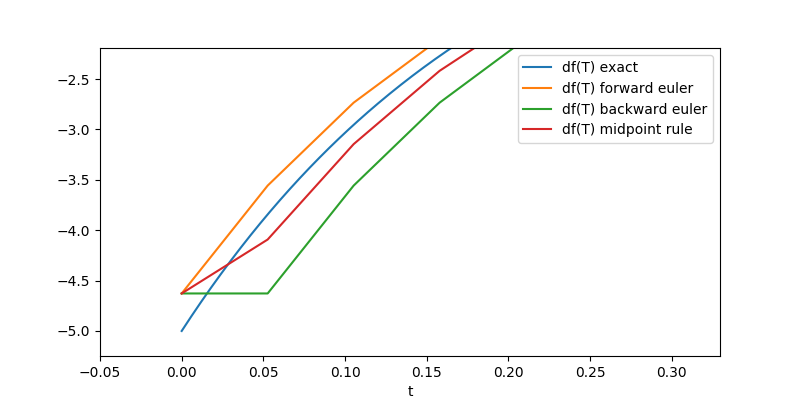

In [38]:
t0 = 0.0
t1 = 1.0
N = 20
Nfine = 1000

T = np.linspace(t0,t1,N)
Tfine = np.linspace(t0,t1,Nfine)

Afw = AFW(T)
Abw = ABW(T)
Amp = AMP(T)

funcnumber = 3

f = func(T,funcnumber)
df_ex = dfunc(Tfine,funcnumber)
df_fw = Afw.dot(f)
df_bw = Abw.dot(f)
df_mp = Amp.dot(f)

fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(Tfine,df_ex, label='df(T) exact')
ax.plot(T,df_fw, label='df(T) forward euler')
ax.plot(T,df_bw, label='df(T) backward euler')
ax.plot(T,df_mp, label='df(T) midpoint rule')
ax.set_xlabel('t')
ax.legend();

# Numerische Lösung einer gewöhnlichen Differentialgleichung

## Ordinary Differential Equation
Given the following ODE:

$
\rho c \frac{d}{dt} \theta \left( t \right) = \dot h_0 exp \left( \frac{-k}{\theta} \right) - q_{ab}
$

Parameters:

$
\rho = 1000 \frac{kg}{m^3}, 
c = 1000 \frac{J}{kg K}, 
\dot h_0 = 1.710^7 \frac{J}{s m^3}, 
k = 561 K, 
q_ab = 7.5 10^5 \frac{J}{s m^3} \\
$

Start condition:

$
\theta_0 = 293 K
$

-->     $
\dot \theta \left( t \right) = \frac {\dot h_0 exp \left( \frac{-k}{\theta} \right) - q_{ab} }{ \rho c}
$

## Explicit Time Integration

The explicit (forward) Euler method is based on:

Finite difference approximation of $ \frac{dx}{dt}$ :

$
\normalsize {
\frac{d}{dt} x \left( t \right) = f \left( x \left( t \right), t \right) \approx \frac{x \left( t + \delta t \right) - x \left( t \right)}{\delta t}
}
$

Iteration:

$
\normalsize {
x \left( t + \delta t \right) \approx x \left( t \right) + \delta t f \left( x \left( t \right), t \right)
} 
$

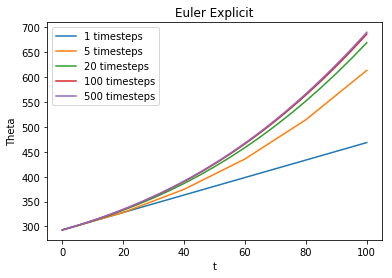

In [94]:
def solve_ode_expl(time_steps):
    # time parameters
    t0 = 0.0
    t1 = 100.0
    N = time_steps
    dt = (t1-t0) / N

    # parameters
    rho = 1000.0
    c = 1000.0
    h_0 = 1.7e7 
    k = 561.0
    q_ab = 7.5e5

    def dot_theta(theta):
        result = (h_0 * np.exp(-k/theta) - q_ab )/(rho*c)
        return result


    # initial condition
    theta_0 = 293  # [K]

    theta = np.zeros(N+1)
    theta[0] = theta_0

    for n in range(1,N+1):
        t = t0 + n*dt
        dxdt = dot_theta(theta[n-1])
        theta[n] = theta[n-1] + dt * dxdt
        
    t = [t_0 + n*dt for n in range(0,N+1)]
    return (t,theta)
        
%matplotlib inline
fig, ax = plt.subplots()

for N in [1,5,20,100,500]:
    t, theta = solve_ode_expl(N)
    ax.plot(t,theta, label='{} timesteps'.format(N))
ax.set_ylabel("Theta")
ax.set_xlabel("t")
ax.legend()
ax.set_title("Euler Explicit")
plt.show()

## Implicit Time Integration

The implicit (backward) Euler method is based on:

Finite difference approximation of $ \frac{dx}{dt}$ :

$
\normalsize {
\frac{d}{dt} x \left( t + \delta t \right) = f \left( x \left( t + \delta t \right), t + \delta t \right) \approx \frac{x \left( t + \delta t \right) - x \left( t \right)}{\delta t}
}
$

Iteration:

$
x \left( t + \delta t \right)  \approx x \left( t \right) + \delta t  f \left( x \left( t + \delta t \right) , t + \delta t \right)
$

The iteration cannot generally be solved for $ x \left( t + \delta t \right) $ analytically. So we solve the "Nullstellenproblem"

$
\normalsize{
f \left( t + \delta t , u_{i+1} \right) - \frac{u_{i+1} - u_i}{\delta t} = 0
}
$

with a predictor-corrector or Netwon's method.